In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [3]:
cnn = Sequential()

#primeira camada de convolução
cnn.add(Conv2D(32, (3,3), input_shape = (128, 128, 3), activation = 'relu'))
cnn.add(BatchNormalization())

#Pooling
cnn.add(MaxPooling2D(pool_size = (2,2)))

In [4]:
cnn.add(Flatten())

In [5]:
#camada densa

cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units = 1, activation = 'sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255)

In [9]:
gerador_teste = ImageDataGenerator(rescale = 1./255)

In [6]:
path='/kaggle/input/training-set'

In [14]:
path2= '/kaggle/input/test-set'

In [17]:
base_treinamento = gerador_treinamento.flow_from_directory(path,
                                                           target_size = (128, 128),
                                                           batch_size = 32,
                                                           class_mode = 'binary')


Found 3034 images belonging to 2 classes.


In [15]:
base_teste = gerador_teste.flow_from_directory(path2,
                                               target_size = (128, 128),
                                               batch_size = 32,
                                               class_mode = 'binary')

Found 340 images belonging to 2 classes.


In [19]:
cnn.fit_generator(base_treinamento, steps_per_epoch = 3034 / 32,  epochs = 50, validation_data = base_teste,  validation_steps = 340 / 32)

/tmp/ipykernel_48/1575053665.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(base_treinamento, steps_per_epoch = 3034 / 32,  epochs = 50, validation_data = base_teste,  validation_steps = 340 / 32)


Epoch 1/50
94/94 [==============================] - 40s 402ms/step - loss: 2.0168 - accuracy: 0.5432 - val_loss: 0.6840 - val_accuracy: 0.5324
Epoch 2/50
94/94 [==============================] - 36s 377ms/step - loss: 0.7660 - accuracy: 0.6131 - val_loss: 0.6519 - val_accuracy: 0.6088
Epoch 3/50
94/94 [==============================] - 35s 366ms/step - loss: 0.6283 - accuracy: 0.6770 - val_loss: 0.6566 - val_accuracy: 0.5853
Epoch 4/50
94/94 [==============================] - 34s 356ms/step - loss: 0.5057 - accuracy: 0.7551 - val_loss: 0.5802 - val_accuracy: 0.7000
Epoch 5/50
94/94 [==============================] - 35s 366ms/step - loss: 0.4086 - accuracy: 0.8102 - val_loss: 0.5254 - val_accuracy: 0.7118
Epoch 6/50
94/94 [==============================] - 34s 359ms/step - loss: 0.2830 - accuracy: 0.8784 - val_loss: 0.4871 - val_accuracy: 0.7441
Epoch 7/50
94/94 [==============================] - 35s 373ms/step - loss: 0.1729 - accuracy: 0.9331 - val_loss: 0.3007 - val_accuracy: 0.8676

In [20]:
base_treinamento.class_indices

{'roses-train': 0, 'tulips-train': 1}

In [22]:
from keras.utils import load_img, img_to_array

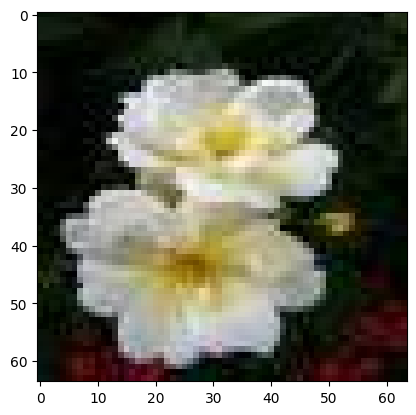

In [25]:
imagem_orig = load_img(path2 + '/roses-test/rose1.jpg')
plt.imshow(imagem_orig)

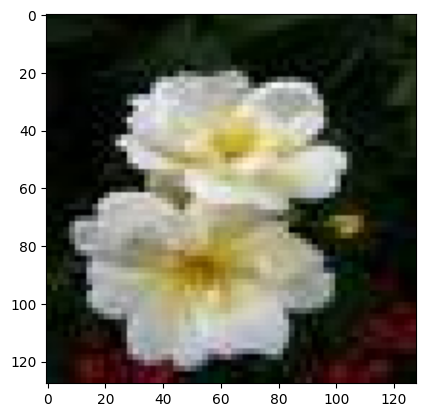

In [26]:
#realizando  a predição para uma imagem
imagem_teste = load_img(path2 + '/roses-test/rose1.jpg', target_size = (128,128))
plt.imshow(imagem_teste)

In [28]:
imagem_teste = img_to_array(imagem_teste)

In [29]:
imagem_teste

array([[[ 3., 17.,  4.],
        [ 3., 17.,  4.],
        [ 4., 18.,  5.],
        ...,
        [34., 46., 24.],
        [31., 43., 21.],
        [31., 43., 21.]],

       [[ 3., 17.,  4.],
        [ 3., 17.,  4.],
        [ 4., 18.,  5.],
        ...,
        [34., 46., 24.],
        [31., 43., 21.],
        [31., 43., 21.]],

       [[15., 29., 16.],
        [15., 29., 16.],
        [14., 28., 15.],
        ...,
        [29., 41., 19.],
        [32., 44., 22.],
        [32., 44., 22.]],

       ...,

       [[ 1., 20., 16.],
        [ 1., 20., 16.],
        [ 4., 16., 12.],
        ...,
        [ 5.,  8.,  1.],
        [ 2.,  7.,  0.],
        [ 2.,  7.,  0.]],

       [[ 6., 25., 21.],
        [ 6., 25., 21.],
        [ 7., 22., 17.],
        ...,
        [ 6.,  9.,  2.],
        [ 0.,  7.,  0.],
        [ 0.,  7.,  0.]],

       [[ 6., 25., 21.],
        [ 6., 25., 21.],
        [ 7., 22., 17.],
        ...,
        [ 6.,  9.,  2.],
        [ 0.,  7.,  0.],
        [ 0.,  7.,  0.]]

In [30]:
imagem_teste.shape

(128, 128, 3)

In [32]:
imagem_teste /= 255

In [33]:
imagem_teste = np.expand_dims(imagem_teste, axis = 0)  #acrescenta uma coluna na imagem para atender o padrão do Keras

In [34]:
prediction = cnn.predict(imagem_teste)

1/1 [==============================] - 0s 137ms/step


In [35]:
print(prediction[0][0])

if prediction[0][0] < 0.5:
  print('Rosa')
else:
  print('Tulipa')

3.4210076e-05
Rosa


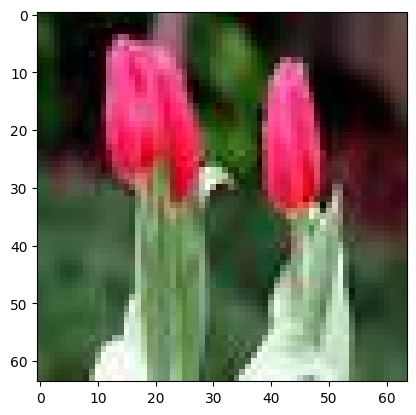

In [36]:
imagem_orig = load_img(path2 + '/tulips-test/tulip1.jpg')
plt.imshow(imagem_orig)

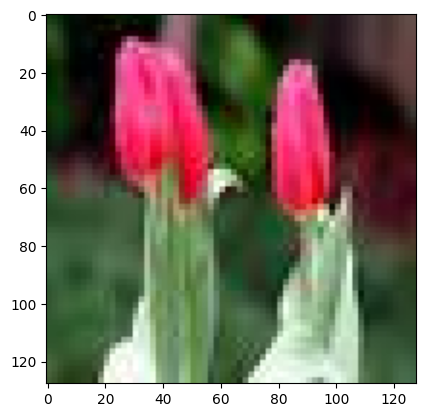

In [37]:
#realizando  a predição para uma imagem
imagem_teste = load_img(path2 + '/tulips-test/tulip1.jpg', target_size = (128,128))
plt.imshow(imagem_teste)

In [39]:
imagem_teste = img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)  #acrescenta uma coluna na imagem para atender o padrão do Keras
prediction = cnn.predict(imagem_teste)
print(prediction[0][0])

if prediction[0][0] < 0.5:
  print('Rosa')
else:
  print('Tulipa')

1/1 [==============================] - 0s 35ms/step
1.0
Tulipa


1/1 [==============================] - 0s 30ms/step
1.0
Tulipa


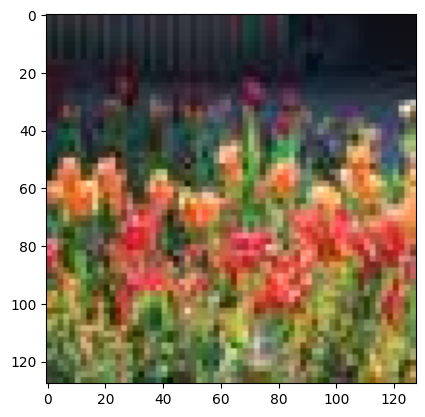

In [40]:
imagem_orig = load_img(path2 + '/tulips-test/tulip101.jpg')
plt.imshow(imagem_orig)
#realizando  a predição para uma imagem
imagem_teste = load_img(path2 + '/tulips-test/tulip101.jpg', target_size = (128,128))
plt.imshow(imagem_teste)
imagem_teste = img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)  #acrescenta uma coluna na imagem para atender o padrão do Keras
prediction = cnn.predict(imagem_teste)
print(prediction[0][0])

if prediction[0][0] < 0.5:
  print('Rosa')
else:
  print('Tulipa')

1/1 [==============================] - 0s 36ms/step
2.1699035e-08
Rosa


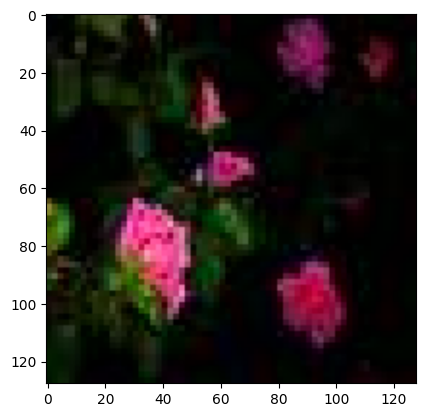

In [41]:
imagem_orig = load_img(path2 + '/roses-test/rose105.jpg')
plt.imshow(imagem_orig)
#realizando  a predição para uma imagem
imagem_teste = load_img(path2 + '/roses-test/rose105.jpg', target_size = (128,128))
plt.imshow(imagem_teste)
imagem_teste = img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)  #acrescenta uma coluna na imagem para atender o padrão do Keras
prediction = cnn.predict(imagem_teste)
print(prediction[0][0])

if prediction[0][0] < 0.5:
  print('Rosa')
else:
  print('Tulipa')

In [42]:
path3 = '/kaggle/input/rosa-teste'

1/1 [==============================] - 0s 32ms/step
2.2164652e-15
Rosa


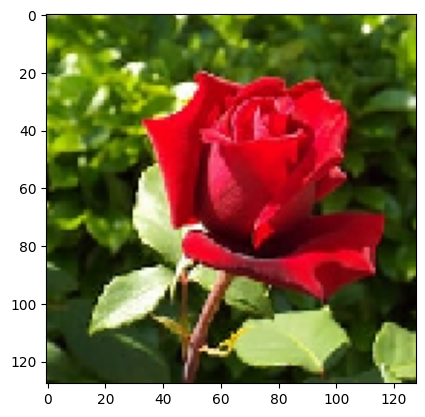

In [45]:
imagem_orig = load_img(path3 + '/rose.jfif')
plt.imshow(imagem_orig)
#realizando  a predição para uma imagem
imagem_teste = load_img(path3 + '/rose.jfif', target_size = (128,128))
plt.imshow(imagem_teste)
imagem_teste = img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)  #acrescenta uma coluna na imagem para atender o padrão do Keras
prediction = cnn.predict(imagem_teste)
print(prediction[0][0])

if prediction[0][0] < 0.5:
  print('Rosa')
else:
  print('Tulipa')

1/1 [==============================] - 0s 41ms/step
3.407005e-08
Rosa


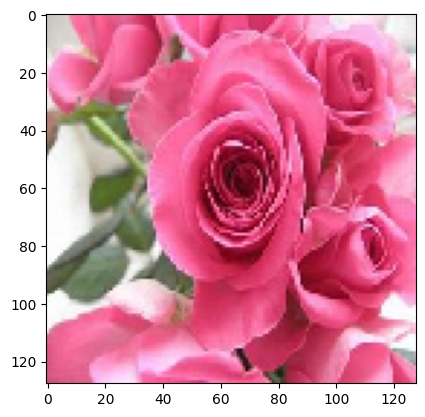

In [46]:
imagem_orig = load_img(path3 + '/rose2.jfif')
plt.imshow(imagem_orig)
#realizando  a predição para uma imagem
imagem_teste = load_img(path3 + '/rose2.jfif', target_size = (128,128))
plt.imshow(imagem_teste)
imagem_teste = img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)  #acrescenta uma coluna na imagem para atender o padrão do Keras
prediction = cnn.predict(imagem_teste)
print(prediction[0][0])

if prediction[0][0] < 0.5:
  print('Rosa')
else:
  print('Tulipa')

1/1 [==============================] - 0s 35ms/step
5.197485e-10
Rosa


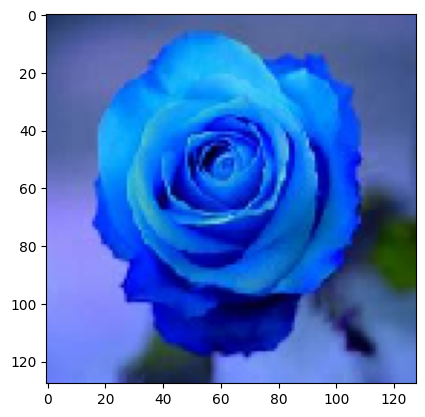

In [47]:
imagem_orig = load_img(path3 + '/rosa3.jfif')
plt.imshow(imagem_orig)
#realizando  a predição para uma imagem
imagem_teste = load_img(path3 + '/rosa3.jfif', target_size = (128,128))
plt.imshow(imagem_teste)
imagem_teste = img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)  #acrescenta uma coluna na imagem para atender o padrão do Keras
prediction = cnn.predict(imagem_teste)
print(prediction[0][0])

if prediction[0][0] < 0.5:
  print('Rosa')
else:
  print('Tulipa')

In [48]:
path4 = '/kaggle/input/tulipas-teste'

1/1 [==============================] - 0s 33ms/step
0.99999994
Tulipa


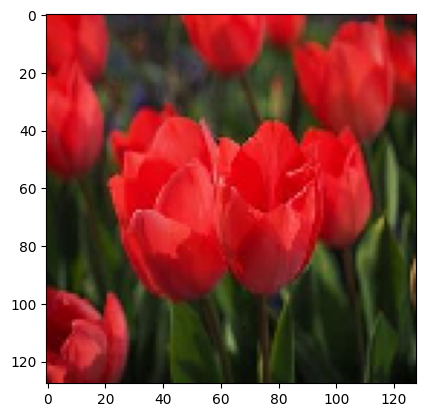

In [49]:
imagem_orig = load_img(path4 + '/tulipa.jfif')
plt.imshow(imagem_orig)
#realizando  a predição para uma imagem
imagem_teste = load_img(path4 + '/tulipa.jfif', target_size = (128,128))
plt.imshow(imagem_teste)
imagem_teste = img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)  #acrescenta uma coluna na imagem para atender o padrão do Keras
prediction = cnn.predict(imagem_teste)
print(prediction[0][0])

if prediction[0][0] < 0.5:
  print('Rosa')
else:
  print('Tulipa')

1/1 [==============================] - 0s 31ms/step
0.0014753261
Rosa


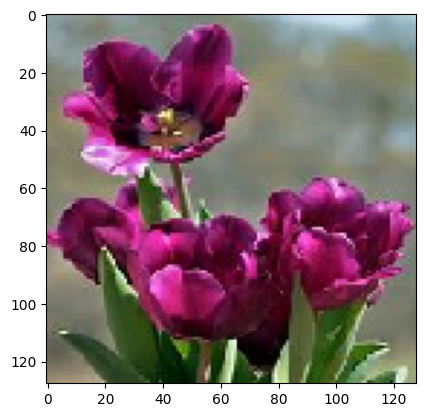

In [50]:
imagem_orig = load_img(path4 + '/tulipa2.jfif')
plt.imshow(imagem_orig)
#realizando  a predição para uma imagem
imagem_teste = load_img(path4 + '/tulipa2.jfif', target_size = (128,128))
plt.imshow(imagem_teste)
imagem_teste = img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)  #acrescenta uma coluna na imagem para atender o padrão do Keras
prediction = cnn.predict(imagem_teste)
print(prediction[0][0])

if prediction[0][0] < 0.5:
  print('Rosa')
else:
  print('Tulipa')

1/1 [==============================] - 0s 33ms/step
0.99980724
Tulipa


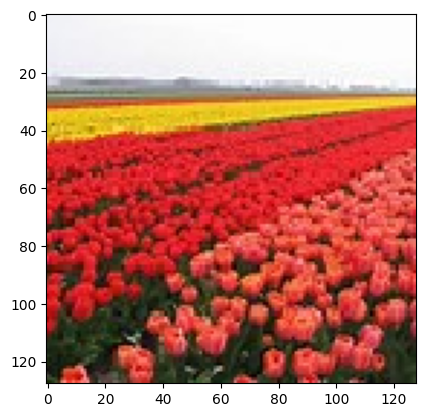

In [51]:
imagem_orig = load_img(path4 + '/tulipa3.jfif')
plt.imshow(imagem_orig)
#realizando  a predição para uma imagem
imagem_teste = load_img(path4 + '/tulipa3.jfif', target_size = (128,128))
plt.imshow(imagem_teste)
imagem_teste = img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)  #acrescenta uma coluna na imagem para atender o padrão do Keras
prediction = cnn.predict(imagem_teste)
print(prediction[0][0])

if prediction[0][0] < 0.5:
  print('Rosa')
else:
  print('Tulipa')

In [52]:
#Salvar o modelo treinado
cnn.save('model_rose_tulip.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
